# Species Segmentation with Cluster Analysis

Iris flower dataset : https://en.wikipedia.org/wiki/Iris_flower_data_set


There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('iris_dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

Text(0, 0.5, 'sepal width')

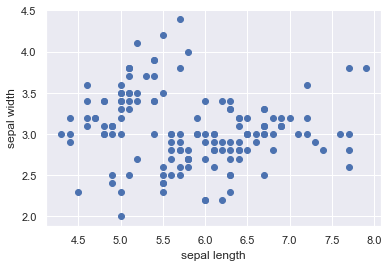

In [3]:
#cluster the iris flowers by the shape of their sepal
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')

# Clustering (unscaled data)

In [4]:
x = data.copy()
kmeans = KMeans(2)#create a k-means object with 2 clusters
kmeans.fit(x)

KMeans(n_clusters=2)

In [5]:
cluster = data.copy()
cluster['cluster'] = kmeans.fit_predict(x)

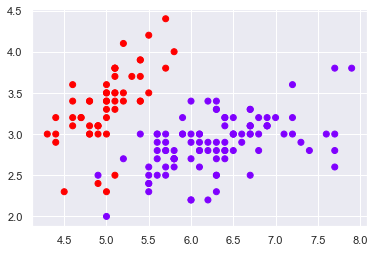

In [6]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster['cluster'],cmap='rainbow')

# Standardize the variables

In [7]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [8]:
kmeans_scaled = KMeans(n_clusters=2)#create a k-means object with 2 clusters
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [9]:
cluster = x.copy()
cluster['cluster'] = kmeans.fit_predict(x_scaled)
cluster

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


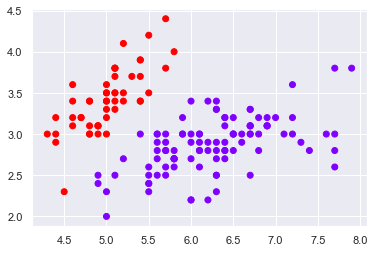

In [10]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster['cluster'],cmap='rainbow')

## Take Advantage of the Elbow Method

### WCSS

In [11]:
WCSS = []

num = 10 #arbitrary number for cluster 
for i in range(1,num):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)
WCSS

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.5511767079852,
 91.0024409856725,
 80.51609408396625,
 70.91337109630959,
 62.45268372832474,
 54.41887692898719]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

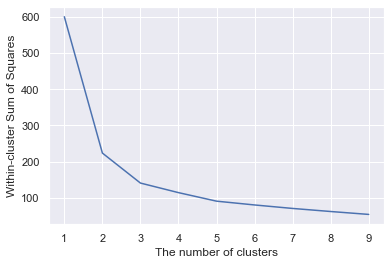

In [12]:
plt.plot(range(1,num), WCSS)
plt.xlabel('The number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 3 clusters

In [16]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [17]:
cluster = x.copy()
cluster['cluster'] = kmeans_3.fit_predict(x_scaled)
cluster

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


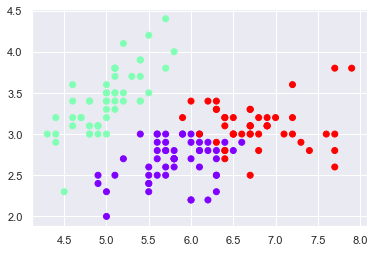

In [18]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster['cluster'],cmap='rainbow')

## 5 clusters

In [19]:
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(x_scaled)

KMeans(n_clusters=5)

In [21]:
cluster = x.copy()
cluster['cluster'] = kmeans_5.fit_predict(x_scaled)
cluster

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


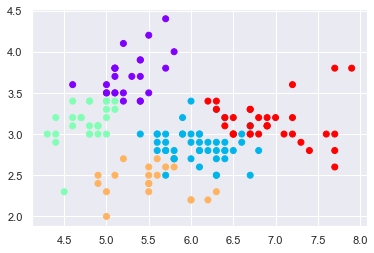

In [22]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster['cluster'],cmap='rainbow')

The original dataset has 3 sub-species of the Iris flower. Therefore, the optimal number of clusters has to be 3.

This shows us that the Eblow method is imperfect but k-means is very useful in moments where we already know the number of clusters. 